<a href="https://colab.research.google.com/github/AndreLovo/Analise-de-dados/blob/master/Olimp%C3%ADadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Analise dos Dados Jogos Olímpicos - Natação 50 m - Livre (Fem e Mas)</center>
Fonte: https://www.olimpiadatododia.com.br/toquio-2020/jogos-olimpicos/natacao/  <br>

Fonte: https://www.olimpiadatododia.com.br/toquio-2020/jogos-olimpicos/natacao/50m-livre-feminino/ <br>

Fonte: https://www.olimpiadatododia.com.br/toquio-2020/jogos-olimpicos/natacao/50m-livre-masculino/ <br>

### Objetivos:
Fazer análise exploratória dos dados da natação nas olimpíadas, através do webscraping 

# Análise Natação 50 m Livre - Feminino

In [151]:
# Importando as bibliotecas
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

In [152]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import pandas as pd

#Obter a resposta em formato HTML
df = pd.read_html('/content/drive/MyDrive/Colab Notebooks/Natação_Dados/50f.html')
#Vamos dar uma olhada no resultado
display(df)

[                                     Data  \
 0  2021-07-30 07:00:0030 de julho de 2021   
 1  2021-07-30 22:30:0030 de julho de 2021   
 2  2021-07-31 22:30:0031 de julho de 2021   
 
                                                Prova Horário/Resultado  
 0  50m livre feminino – Eliminatórias x Etiene Me...     07:00:0007:00  
 1                  50m livre feminino – Semifinais x     22:30:0022:30  
 2                       50m livre feminino – Final x     22:30:0022:30  ,
                 0                          1                              2  \
 0           Jogos                       Ouro                          Prata   
 1       Seul 1988         Kristin Otto (GDR)               Yang Wenyi (CHN)   
 2  Barcelona 1992           Yang Wenyi (CHN)              Zhuang Yong (CHN)   
 3    Atlanta 1996        Amy Van Dyken (USA)                Le Jingyi (CHN)   
 4     Sydney 2000       Inge de Bruijn (NED)        Therèse Alshammar (SWE)   
 5     Atenas 2004       Inge de Brui

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Separando as 3 tabelas

In [154]:
#Tabela 1
tabela50f1 = df[0]
display(tabela50f1)

,Data,Prova,Horário/Resultado
0,2021-07-30 07:00:0030 de julho de 2021,50m livre feminino – Eliminatórias x Etiene Me...,07:00:0007:00
1,2021-07-30 22:30:0030 de julho de 2021,50m livre feminino – Semifinais x,22:30:0022:30
2,2021-07-31 22:30:0031 de julho de 2021,50m livre feminino – Final x,22:30:0022:30


In [155]:
# Verificando as informações da tabela 
tabela50f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Data               3 non-null      object
 1   Prova              3 non-null      object
 2   Horário/Resultado  3 non-null      object
dtypes: object(3)
memory usage: 200.0+ bytes


In [156]:
# Alterando os tipos dos dados para string
tabela50f1['Data'] = tabela50f1['Data'].astype(str)
tabela50f1['Prova'] = tabela50f1['Prova'].astype(str)
tabela50f1['Horário/Resultado'] = tabela50f1['Horário/Resultado'].astype(str)

In [157]:
display(tabela50f1)

,Data,Prova,Horário/Resultado
0,2021-07-30 07:00:0030 de julho de 2021,50m livre feminino – Eliminatórias x Etiene Me...,07:00:0007:00
1,2021-07-30 22:30:0030 de julho de 2021,50m livre feminino – Semifinais x,22:30:0022:30
2,2021-07-31 22:30:0031 de julho de 2021,50m livre feminino – Final x,22:30:0022:30


In [158]:
#Tabela 2
tabela50f2 = df[1]
tabela50f2.columns = tabela50f2.iloc[0]#subindo a linha 0
tabela50f2=tabela50f2[1:9]#tirando a linha 0
display(tabela50f2)

,Jogos,Ouro,Prata,Bronze
1,Seul 1988,Kristin Otto (GDR),Yang Wenyi (CHN),Katrin Meissner (GDR)Jill Sterkel (USA)
2,Barcelona 1992,Yang Wenyi (CHN),Zhuang Yong (CHN),Angel Martino (USA)
3,Atlanta 1996,Amy Van Dyken (USA),Le Jingyi (CHN),Sandra Völker (GER)
4,Sydney 2000,Inge de Bruijn (NED),Therèse Alshammar (SWE),Dara Torres (USA)
5,Atenas 2004,Inge de Bruijn (NED),Malia Metella (FRA),Libby Lenton (AUS)
6,Pequim 2008,Britta Steffen (GER),Dara Torres (USA),Cate Campbell (AUS)
7,Londres 2012,Ranomi Kromowidjojo (NED),Aliaksandra Herasimenia (BLR),Marleen Veldhuis (NED)
8,Rio 2016,Pernille Blume (DEN),Simone Manuel (USA),Aliaksandra Herasimenia (BLR)


In [159]:
# Verificando as informações da tabela 
tabela50f2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 1 to 8
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Jogos   8 non-null      object
 1   Ouro    8 non-null      object
 2   Prata   8 non-null      object
 3   Bronze  8 non-null      object
dtypes: object(4)
memory usage: 388.0+ bytes


In [160]:
# As informações estão separadas por um espaço
tabela50f2[[0, 1]] = tabela50f2["Jogos"].str.split(" ", expand=True)
display(tabela50f2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Jogos,Ouro,Prata,Bronze,0,1
1,Seul 1988,Kristin Otto (GDR),Yang Wenyi (CHN),Katrin Meissner (GDR)Jill Sterkel (USA),Seul,1988
2,Barcelona 1992,Yang Wenyi (CHN),Zhuang Yong (CHN),Angel Martino (USA),Barcelona,1992
3,Atlanta 1996,Amy Van Dyken (USA),Le Jingyi (CHN),Sandra Völker (GER),Atlanta,1996
4,Sydney 2000,Inge de Bruijn (NED),Therèse Alshammar (SWE),Dara Torres (USA),Sydney,2000
5,Atenas 2004,Inge de Bruijn (NED),Malia Metella (FRA),Libby Lenton (AUS),Atenas,2004
6,Pequim 2008,Britta Steffen (GER),Dara Torres (USA),Cate Campbell (AUS),Pequim,2008
7,Londres 2012,Ranomi Kromowidjojo (NED),Aliaksandra Herasimenia (BLR),Marleen Veldhuis (NED),Londres,2012
8,Rio 2016,Pernille Blume (DEN),Simone Manuel (USA),Aliaksandra Herasimenia (BLR),Rio,2016


In [161]:
# Verificando as informações da tabela 
tabela50f2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 1 to 8
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Jogos   8 non-null      object
 1   Ouro    8 non-null      object
 2   Prata   8 non-null      object
 3   Bronze  8 non-null      object
 4   0       8 non-null      object
 5   1       8 non-null      object
dtypes: object(6)
memory usage: 516.0+ bytes


In [162]:
#Retirando a coluna que foi separada
tabela50f2 = tabela50f2.drop("Jogos", axis=1)
display(tabela50f2)

,Ouro,Prata,Bronze,0,1
1,Kristin Otto (GDR),Yang Wenyi (CHN),Katrin Meissner (GDR)Jill Sterkel (USA),Seul,1988
2,Yang Wenyi (CHN),Zhuang Yong (CHN),Angel Martino (USA),Barcelona,1992
3,Amy Van Dyken (USA),Le Jingyi (CHN),Sandra Völker (GER),Atlanta,1996
4,Inge de Bruijn (NED),Therèse Alshammar (SWE),Dara Torres (USA),Sydney,2000
5,Inge de Bruijn (NED),Malia Metella (FRA),Libby Lenton (AUS),Atenas,2004
6,Britta Steffen (GER),Dara Torres (USA),Cate Campbell (AUS),Pequim,2008
7,Ranomi Kromowidjojo (NED),Aliaksandra Herasimenia (BLR),Marleen Veldhuis (NED),Londres,2012
8,Pernille Blume (DEN),Simone Manuel (USA),Aliaksandra Herasimenia (BLR),Rio,2016


In [163]:
# Alterando os tipos dos dados para string
tabela50f2['Ouro'] = tabela50f2['Ouro'].astype(str)
tabela50f2['Prata'] = tabela50f2['Prata'].astype(str)
tabela50f2['Bronze'] = tabela50f2['Bronze'].astype(str)
tabela50f2[0] = tabela50f2[0].astype(str)
tabela50f2[1] = tabela50f2[1].astype(int)

In [164]:
# Verificando as informações da tabela 
tabela50f2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 1 to 8
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ouro    8 non-null      object
 1   Prata   8 non-null      object
 2   Bronze  8 non-null      object
 3   0       8 non-null      object
 4   1       8 non-null      int64 
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [165]:
#Renomeando as colunas 0 e 1 em 'Sede','Ano'
tabela50f2.rename(columns={0: 'Cidade'}, inplace=True)
tabela50f2.rename(columns={1: 'Ano'}, inplace=True)
tabela50f2.rename(columns={'Ouro': 'OuroNadadoraPaís'}, inplace=True)
tabela50f2.rename(columns={'Prata': 'PrataNadadoraPaís'}, inplace=True)
tabela50f2.rename(columns={'Bronze': 'BronzeNadadoraPaís'}, inplace=True)
display(tabela50f2)

,OuroNadadoraPaís,PrataNadadoraPaís,BronzeNadadoraPaís,Cidade,Ano
1,Kristin Otto (GDR),Yang Wenyi (CHN),Katrin Meissner (GDR)Jill Sterkel (USA),Seul,1988
2,Yang Wenyi (CHN),Zhuang Yong (CHN),Angel Martino (USA),Barcelona,1992
3,Amy Van Dyken (USA),Le Jingyi (CHN),Sandra Völker (GER),Atlanta,1996
4,Inge de Bruijn (NED),Therèse Alshammar (SWE),Dara Torres (USA),Sydney,2000
5,Inge de Bruijn (NED),Malia Metella (FRA),Libby Lenton (AUS),Atenas,2004
6,Britta Steffen (GER),Dara Torres (USA),Cate Campbell (AUS),Pequim,2008
7,Ranomi Kromowidjojo (NED),Aliaksandra Herasimenia (BLR),Marleen Veldhuis (NED),Londres,2012
8,Pernille Blume (DEN),Simone Manuel (USA),Aliaksandra Herasimenia (BLR),Rio,2016


In [166]:
# Salvando o arquivo na pasta em excel
tabela50f2.to_excel('/content/drive/MyDrive/Colab Notebooks/Natação_Dados/tabela50f2.xlsx', index = True)
# /content/drive/MyDrive/Colab Notebooks/Natação_Dados/tabela50f2.xlsx
#, encoding='cp1252'

In [167]:
#Localizando um dado específico - Posições da nadadora Yang Wenyi (CHN)
tabela50f2.query('OuroNadadoraPaís =="Yang Wenyi (CHN)" | PrataNadadoraPaís =="Yang Wenyi (CHN)" | BronzeNadadoraPaís =="Yang Wenyi (CHN)"').head(8)

,OuroNadadoraPaís,PrataNadadoraPaís,BronzeNadadoraPaís,Cidade,Ano
1,Kristin Otto (GDR),Yang Wenyi (CHN),Katrin Meissner (GDR)Jill Sterkel (USA),Seul,1988
2,Yang Wenyi (CHN),Zhuang Yong (CHN),Angel Martino (USA),Barcelona,1992


In [168]:
#Localizando um dado específico - Posições da nadadora Dara Torres
tabela50f2.query('OuroNadadoraPaís =="Dara Torres (USA)" | PrataNadadoraPaís =="Dara Torres (USA)" | BronzeNadadoraPaís =="Dara Torres (USA)"').head(8)

,OuroNadadoraPaís,PrataNadadoraPaís,BronzeNadadoraPaís,Cidade,Ano
4,Inge de Bruijn (NED),Therèse Alshammar (SWE),Dara Torres (USA),Sydney,2000
6,Britta Steffen (GER),Dara Torres (USA),Cate Campbell (AUS),Pequim,2008


In [169]:
# Verificando as informações da tabela 
tabela50f2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 1 to 8
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   OuroNadadoraPaís    8 non-null      object
 1   PrataNadadoraPaís   8 non-null      object
 2   BronzeNadadoraPaís  8 non-null      object
 3   Cidade              8 non-null      object
 4   Ano                 8 non-null      int64 
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [170]:
#Localizando os dados da linha com o índice 3
tabela50f2.iloc[3]

0
OuroNadadoraPaís         Inge de Bruijn (NED)
PrataNadadoraPaís     Therèse Alshammar (SWE)
BronzeNadadoraPaís          Dara Torres (USA)
Cidade                                 Sydney
Ano                                      2000
Name: 4, dtype: object

In [171]:
#Tabela3
tabela50f3 = df[2]
tabela50f3.columns = tabela50f3.iloc[0]#subindo ou copiando a linha 0
tabela50f3=tabela50f3[1:11]#tirando a linha 0
display(tabela50f3)

,País,Ouro,Prata,Bronze,Total
1,Holanda,3,0,1,4
2,China,1,3,0,4
3,Estados Unidos,1,2,3,6
4,Alemanha Oriental,1,0,1,2
5,Alemanha,1,0,1,2
6,Dinamarca,1,0,0,1
7,Belarus,0,1,1,2
8,França,0,1,0,1
9,Suécia,0,1,0,1
10,Austrália,0,0,2,2


In [172]:
# Verificando as informações da tabela 
tabela50f3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 1 to 10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   País    10 non-null     object
 1   Ouro    10 non-null     object
 2   Prata   10 non-null     object
 3   Bronze  10 non-null     object
 4   Total   10 non-null     object
dtypes: object(5)
memory usage: 532.0+ bytes


In [173]:
tabela50f3[['Ouro','Prata','Bronze','Total']] = tabela50f3[['Ouro','Prata','Bronze','Total']].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [174]:
tabela50f3['País'] = tabela50f3['País'].astype('string')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [175]:
#Tabela Número de Medalhas 50m (Fem) x Países
display(tabela50f3)

,País,Ouro,Prata,Bronze,Total
1,Holanda,3,0,1,4
2,China,1,3,0,4
3,Estados Unidos,1,2,3,6
4,Alemanha Oriental,1,0,1,2
5,Alemanha,1,0,1,2
6,Dinamarca,1,0,0,1
7,Belarus,0,1,1,2
8,França,0,1,0,1
9,Suécia,0,1,0,1
10,Austrália,0,0,2,2


In [176]:
# Salvando o arquivo na pasta em excel
tabela50f3.to_excel  ('/content/drive/MyDrive/Colab Notebooks/Natação_Dados/tabela50f3.xlsx', index = True)
# /content/drive/MyDrive/Colab Notebooks/Natação_Dados/tabela50f3.xlsx

In [177]:
#Visualização para a distribuição do Total das Medalhas
País=['Holanda','China','Estados Unidos','Alemanha Oriental','Alemanha','Dinamarca','Belarus','França','Suécia','Austrália']
Total=[4,4,6,2,2,1,2,1,1,2]

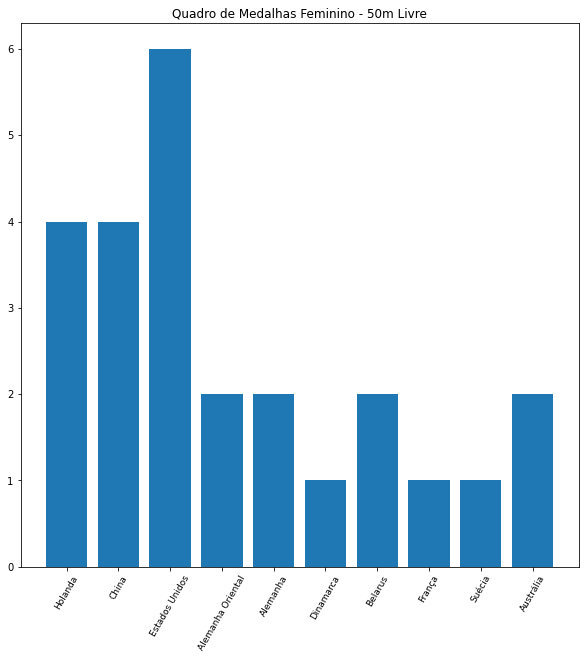

In [178]:
# Aumentando o tamanho dos gráficos
plt.figure(figsize=(10,10))
#Plotando o gráfico de barras
plt.bar(País,Total)
plt.xticks (rotation= 60, fontsize=9)
plt.title("Quadro de Medalhas Feminino - 50m Livre")
plt.show()

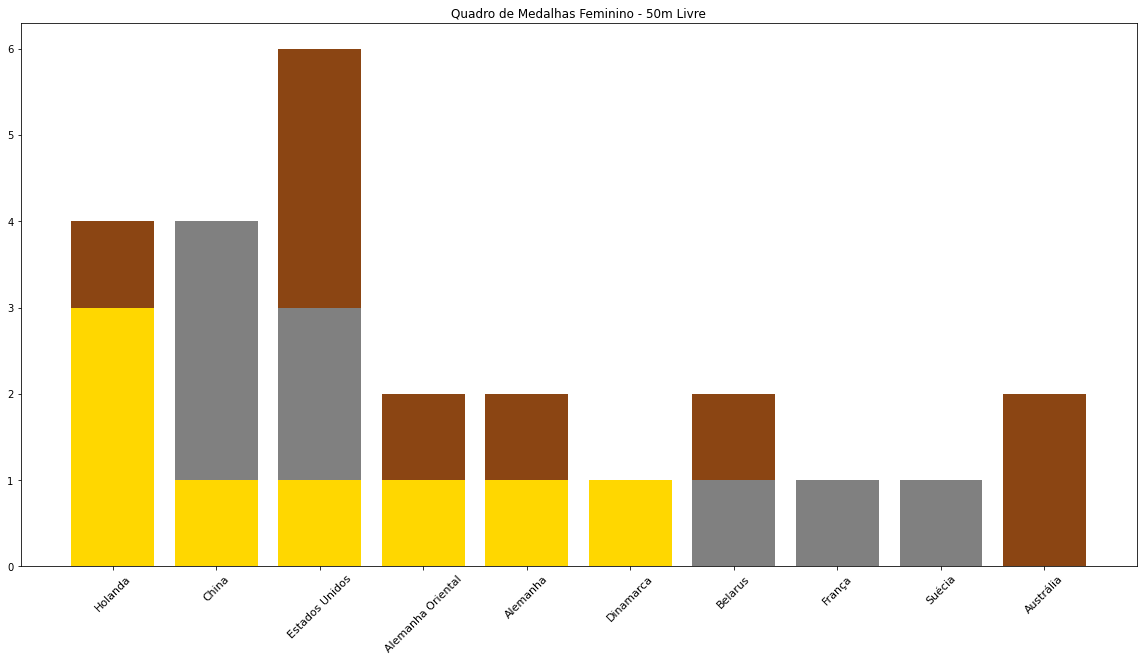

In [179]:
# Gráfico de Barras Aninhado
País=['Holanda','China','Estados Unidos','Alemanha Oriental','Alemanha','Dinamarca','Belarus','França','Suécia','Austrália']

Ouro=[3,1,1,1,1,1,0,0,0,0]
Prata=[0,3,2,0,0,0,1,1,1,0]
Bronze=[1,0,3,1,1,0,1,0,0,2]

# Aumentando o tamanho dos gráficos
plt.figure(figsize=(20,10))

#Plotando o gráfico de barras
plt.bar(País, Ouro, color = 'gold')
plt.bar(País, Prata, color = 'grey', bottom = np.array(Ouro))
plt.bar(País, Bronze, color = 'saddlebrown', bottom = np.array(Ouro) + np.array(Prata))


plt.xticks (rotation= 45, fontsize=11)
plt.title("Quadro de Medalhas Feminino - 50m Livre")
plt.show()

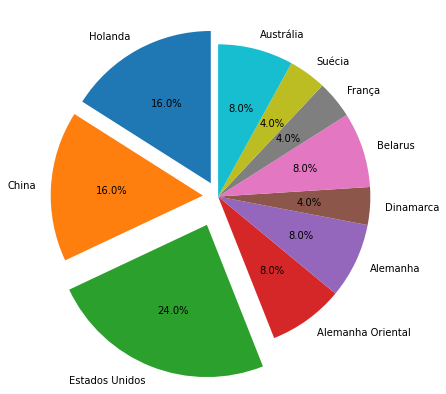

In [180]:
# Imprimir gráfico de Pizza para verificação de Porcentagem

País=['Holanda','China','Estados Unidos','Alemanha Oriental','Alemanha','Dinamarca','Belarus','França','Suécia','Austrália']
Total=[4,4,6,2,2,1,2,1,1,2]
explode = (0.1,0.1,0.2,0,0,0,0,0,0,0)

# Criando a figura para a plotagem

plt.subplots(figsize=(7,7))

# Fazendo um gráfico de Pizza para melhor visualizacao
plt.pie(x= Total, labels=País, explode=explode, autopct='%1.1f%%', startangle=90)


# Mostrando o grafico
plt.show()

In [181]:
# Verificando as informações da tabela 
tabela50f3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 1 to 10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   País    10 non-null     string
 1   Ouro    10 non-null     int64 
 2   Prata   10 non-null     int64 
 3   Bronze  10 non-null     int64 
 4   Total   10 non-null     int64 
dtypes: int64(4), string(1)
memory usage: 532.0 bytes


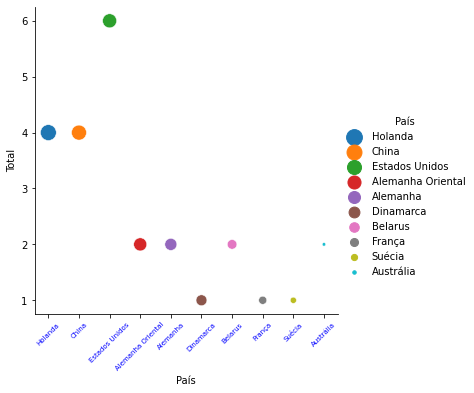

In [182]:
# Imprimindo o gráfico scatter - relplot
sns.relplot(x="País", y="Total", data=tabela50f3, hue="País", sizes=(12,250), size="País")
plt.xticks(color='blue',rotation=45,size=7)
#sns.relplot(x="País", y="Ouro", data=tabela50f3, hue="País", sizes=(12,250), size="País")
#plt.xticks(color='blue',rotation=45,size=7)
plt.show()

In [183]:
# Automatizar a construção de Gráficos:
#for coluna in tabela50f3: #Por padrão no for ele percorre as colunas
#   grafico = px.histogram(tabela50f3, x=coluna, color="País")
#   grafico.show()
#Podemos olhar cada um dos gráficos que "saltam aos olhos"

# Análise Natação 50 m Livre - Masculino

In [184]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import pandas as pd

#Obter a resposta em formato HTML
dfm = pd.read_html('/content/drive/MyDrive/Colab Notebooks/Natação_Dados/50m.html')

#Vamos dar uma olhada no resultado
display(dfm)

[                                     Data  \
 0  2021-07-30 07:00:0030 de julho de 2021   
 1  2021-07-30 22:30:0030 de julho de 2021   
 2  2021-07-31 22:30:0031 de julho de 2021   
 
                                                Prova Horário/Resultado  
 0  50m livre masculino – Eliminatórias x Bruno Fr...     07:00:0007:00  
 1                 50m livre masculino – Semifinais x     22:30:0022:30  
 2                      50m livre masculino – Final x     22:30:0022:30  ,
                 0                                       1  \
 0           Jogos                                    Ouro   
 1      Seull 1988                       Matt Biondi (USA)   
 2  Barcelona 1992                   Aleksandr Popov (EUN)   
 3     Atenas 1996                   Aleksandr Popov (RUS)   
 4     Sydney 2000  Gary Hall Jr. (USA)Anthony Ervin (USA)   
 5     Atenas 2004                     Gary Hall Jr. (USA)   
 6     Pequim 2008                 César Cielo Filho (BRA)   
 7    Londres 2012   

# Separando as tabelas

In [185]:
#Tabela 1
tabela50m1 = dfm[0]
display(tabela50m1)

,Data,Prova,Horário/Resultado
0,2021-07-30 07:00:0030 de julho de 2021,50m livre masculino – Eliminatórias x Bruno Fr...,07:00:0007:00
1,2021-07-30 22:30:0030 de julho de 2021,50m livre masculino – Semifinais x,22:30:0022:30
2,2021-07-31 22:30:0031 de julho de 2021,50m livre masculino – Final x,22:30:0022:30


In [186]:
# Verificando as informações da tabela 
tabela50m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Data               3 non-null      object
 1   Prova              3 non-null      object
 2   Horário/Resultado  3 non-null      object
dtypes: object(3)
memory usage: 200.0+ bytes


In [187]:
#Tabela 2
tabela50m2 = dfm[1]
display(tabela50m2)

,0,1,2,3
0,Jogos,Ouro,Prata,Bronze
1,Seull 1988,Matt Biondi (USA),Tom Jager (USA),Gennady Prigoda (TRS)
2,Barcelona 1992,Aleksandr Popov (EUN),Matt Biondi (USA),Tom Jager (USA)
3,Atenas 1996,Aleksandr Popov (RUS),Gary Hall Jr. (USA),Fernando Scherer (BRA)
4,Sydney 2000,Gary Hall Jr. (USA)Anthony Ervin (USA),—,Pieter van den Hoogenband (NED)
5,Atenas 2004,Gary Hall Jr. (USA),Duje Draganja (CRO),Roland Schoeman (RSA)
6,Pequim 2008,César Cielo Filho (BRA),Amaury Leveaux (FRA),Alain Bernard (FRA)
7,Londres 2012,Florent Manaudou (FRA),Cullen Jones (USA),César Cielo Filho (BRA)
8,Rio 2016,Anthony Ervin (USA),Florent Manaudou (FRA),Nathan Adrian (USA)


In [188]:
# Verificando as informações da tabela 
tabela50m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9 non-null      object
 1   1       9 non-null      object
 2   2       9 non-null      object
 3   3       9 non-null      object
dtypes: object(4)
memory usage: 416.0+ bytes


In [189]:
#Tabela 2
tabela50m2 = dfm[1]
tabela50m2.columns = tabela50m2.iloc[0]#subindo a linha 0
tabela50m2=tabela50m2[1:10]#tirando a linha 0
display(tabela50m2)

,Jogos,Ouro,Prata,Bronze
1,Seull 1988,Matt Biondi (USA),Tom Jager (USA),Gennady Prigoda (TRS)
2,Barcelona 1992,Aleksandr Popov (EUN),Matt Biondi (USA),Tom Jager (USA)
3,Atenas 1996,Aleksandr Popov (RUS),Gary Hall Jr. (USA),Fernando Scherer (BRA)
4,Sydney 2000,Gary Hall Jr. (USA)Anthony Ervin (USA),—,Pieter van den Hoogenband (NED)
5,Atenas 2004,Gary Hall Jr. (USA),Duje Draganja (CRO),Roland Schoeman (RSA)
6,Pequim 2008,César Cielo Filho (BRA),Amaury Leveaux (FRA),Alain Bernard (FRA)
7,Londres 2012,Florent Manaudou (FRA),Cullen Jones (USA),César Cielo Filho (BRA)
8,Rio 2016,Anthony Ervin (USA),Florent Manaudou (FRA),Nathan Adrian (USA)


In [190]:
# Verificando as informações da tabela 
tabela50m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 1 to 8
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Jogos   8 non-null      object
 1   Ouro    8 non-null      object
 2   Prata   8 non-null      object
 3   Bronze  8 non-null      object
dtypes: object(4)
memory usage: 388.0+ bytes


In [191]:
# As informações estão separadas por um espaço
tabela50m2[[0, 1]] = tabela50m2["Jogos"].str.split(" ", expand=True)
display(tabela50m2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Jogos,Ouro,Prata,Bronze,0,1
1,Seull 1988,Matt Biondi (USA),Tom Jager (USA),Gennady Prigoda (TRS),Seull,1988
2,Barcelona 1992,Aleksandr Popov (EUN),Matt Biondi (USA),Tom Jager (USA),Barcelona,1992
3,Atenas 1996,Aleksandr Popov (RUS),Gary Hall Jr. (USA),Fernando Scherer (BRA),Atenas,1996
4,Sydney 2000,Gary Hall Jr. (USA)Anthony Ervin (USA),—,Pieter van den Hoogenband (NED),Sydney,2000
5,Atenas 2004,Gary Hall Jr. (USA),Duje Draganja (CRO),Roland Schoeman (RSA),Atenas,2004
6,Pequim 2008,César Cielo Filho (BRA),Amaury Leveaux (FRA),Alain Bernard (FRA),Pequim,2008
7,Londres 2012,Florent Manaudou (FRA),Cullen Jones (USA),César Cielo Filho (BRA),Londres,2012
8,Rio 2016,Anthony Ervin (USA),Florent Manaudou (FRA),Nathan Adrian (USA),Rio,2016


In [192]:
#Retirando a coluna que foi separada
tabela50m2 = tabela50m2.drop("Jogos", axis=1)
display(tabela50m2)

,Ouro,Prata,Bronze,0,1
1,Matt Biondi (USA),Tom Jager (USA),Gennady Prigoda (TRS),Seull,1988
2,Aleksandr Popov (EUN),Matt Biondi (USA),Tom Jager (USA),Barcelona,1992
3,Aleksandr Popov (RUS),Gary Hall Jr. (USA),Fernando Scherer (BRA),Atenas,1996
4,Gary Hall Jr. (USA)Anthony Ervin (USA),—,Pieter van den Hoogenband (NED),Sydney,2000
5,Gary Hall Jr. (USA),Duje Draganja (CRO),Roland Schoeman (RSA),Atenas,2004
6,César Cielo Filho (BRA),Amaury Leveaux (FRA),Alain Bernard (FRA),Pequim,2008
7,Florent Manaudou (FRA),Cullen Jones (USA),César Cielo Filho (BRA),Londres,2012
8,Anthony Ervin (USA),Florent Manaudou (FRA),Nathan Adrian (USA),Rio,2016


In [193]:
# Alterando os tipos dos dados para string
tabela50m2['Ouro'] = tabela50m2['Ouro'].astype(str)
tabela50m2['Prata'] = tabela50m2['Prata'].astype(str)
tabela50m2['Bronze'] = tabela50m2['Bronze'].astype(str)
tabela50m2[0] = tabela50m2[0].astype(str)
tabela50m2[1] = tabela50m2[1].astype(int)

In [194]:
# Verificando as informações da tabela 
tabela50m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 1 to 8
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ouro    8 non-null      object
 1   Prata   8 non-null      object
 2   Bronze  8 non-null      object
 3   0       8 non-null      object
 4   1       8 non-null      int64 
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [195]:
#Renomeando as colunas 0 e 1 em 'Sede','Ano'
tabela50m2.rename(columns={0: 'Cidade'}, inplace=True)
tabela50m2.rename(columns={1: 'Ano'}, inplace=True)
tabela50m2.rename(columns={'Ouro': 'OuroNadadorPaís'}, inplace=True)
tabela50m2.rename(columns={'Prata': 'PrataNadadorPaís'}, inplace=True)
tabela50m2.rename(columns={'Bronze': 'BronzeNadadorPaís'}, inplace=True)
display(tabela50m2)

,OuroNadadorPaís,PrataNadadorPaís,BronzeNadadorPaís,Cidade,Ano
1,Matt Biondi (USA),Tom Jager (USA),Gennady Prigoda (TRS),Seull,1988
2,Aleksandr Popov (EUN),Matt Biondi (USA),Tom Jager (USA),Barcelona,1992
3,Aleksandr Popov (RUS),Gary Hall Jr. (USA),Fernando Scherer (BRA),Atenas,1996
4,Gary Hall Jr. (USA)Anthony Ervin (USA),—,Pieter van den Hoogenband (NED),Sydney,2000
5,Gary Hall Jr. (USA),Duje Draganja (CRO),Roland Schoeman (RSA),Atenas,2004
6,César Cielo Filho (BRA),Amaury Leveaux (FRA),Alain Bernard (FRA),Pequim,2008
7,Florent Manaudou (FRA),Cullen Jones (USA),César Cielo Filho (BRA),Londres,2012
8,Anthony Ervin (USA),Florent Manaudou (FRA),Nathan Adrian (USA),Rio,2016


In [196]:
tabela50m2=tabela50m2[['Ano','Cidade','OuroNadadorPaís','PrataNadadorPaís','BronzeNadadorPaís']]
display(tabela50m2)

,Ano,Cidade,OuroNadadorPaís,PrataNadadorPaís,BronzeNadadorPaís
1,1988,Seull,Matt Biondi (USA),Tom Jager (USA),Gennady Prigoda (TRS)
2,1992,Barcelona,Aleksandr Popov (EUN),Matt Biondi (USA),Tom Jager (USA)
3,1996,Atenas,Aleksandr Popov (RUS),Gary Hall Jr. (USA),Fernando Scherer (BRA)
4,2000,Sydney,Gary Hall Jr. (USA)Anthony Ervin (USA),—,Pieter van den Hoogenband (NED)
5,2004,Atenas,Gary Hall Jr. (USA),Duje Draganja (CRO),Roland Schoeman (RSA)
6,2008,Pequim,César Cielo Filho (BRA),Amaury Leveaux (FRA),Alain Bernard (FRA)
7,2012,Londres,Florent Manaudou (FRA),Cullen Jones (USA),César Cielo Filho (BRA)
8,2016,Rio,Anthony Ervin (USA),Florent Manaudou (FRA),Nathan Adrian (USA)


## Gerar a tabela em excel - .xlsx

In [197]:
# Salvando o arquivo na pasta em excel
tabela50m2.to_excel('/content/drive/MyDrive/Colab Notebooks/Natação_Dados/tabela50m2.xlsx', index = True)
#, encoding='cp1252'

In [198]:
#Localizando um dado específico - Posições do nadador: César Cielo Filho (BRA)
tabela50m2.query('OuroNadadorPaís =="César Cielo Filho (BRA)" | PrataNadadorPaís =="César Cielo Filho (BRA)" | BronzeNadadorPaís =="César Cielo Filho (BRA)"').head(8)

,Ano,Cidade,OuroNadadorPaís,PrataNadadorPaís,BronzeNadadorPaís
6,2008,Pequim,César Cielo Filho (BRA),Amaury Leveaux (FRA),Alain Bernard (FRA)
7,2012,Londres,Florent Manaudou (FRA),Cullen Jones (USA),César Cielo Filho (BRA)


In [199]:
#Localizando um dado específico - Posições do nadador: Fernando Scherer (BRA)
tabela50m2.query('OuroNadadorPaís =="Fernando Scherer (BRA)" | PrataNadadorPaís =="Fernando Scherer (BRA)" | BronzeNadadorPaís =="Fernando Scherer (BRA)"').head(4)

,Ano,Cidade,OuroNadadorPaís,PrataNadadorPaís,BronzeNadadorPaís
3,1996,Atenas,Aleksandr Popov (RUS),Gary Hall Jr. (USA),Fernando Scherer (BRA)


In [200]:
#Tabela 3
tabela50m3 = dfm[2]
display(tabela50m3)

,0,1,2,3,4
0,País,Ouro,Prata,Bronze,Total
1,Estados Unidos,5,4,2,11
2,França,1,2,1,4
3,Brasil,1,0,2,3
4,Rússia,1,0,0,1
5,Equipe Unificada,1,0,0,1
6,Croácia,0,1,0,1
7,Holanda,0,0,1,1
8,África do Sul,0,0,1,1
9,União Soviética,0,0,1,1


In [201]:
#Tabela 3
tabela50m3 = dfm[2]
tabela50m3.columns = tabela50m3.iloc[0]#subindo a linha 0
tabela50m3=tabela50m3[1:10]#tirando a linha 0
display(tabela50m3)

,País,Ouro,Prata,Bronze,Total
1,Estados Unidos,5,4,2,11
2,França,1,2,1,4
3,Brasil,1,0,2,3
4,Rússia,1,0,0,1
5,Equipe Unificada,1,0,0,1
6,Croácia,0,1,0,1
7,Holanda,0,0,1,1
8,África do Sul,0,0,1,1
9,União Soviética,0,0,1,1


In [202]:
# Verificando as informações da tabela 
tabela50m3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 1 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   País    9 non-null      object
 1   Ouro    9 non-null      object
 2   Prata   9 non-null      object
 3   Bronze  9 non-null      object
 4   Total   9 non-null      object
dtypes: object(5)
memory usage: 492.0+ bytes


In [203]:
# Alterando os tipos dos dados para string
#tabela50m3['País'] = tabela50m3['País'].astype(str)
#tabela50m3['Ouro/Nadador/País'] = tabela50m3['Ouro/Nadador/País'].astype(int)
#tabela50m3['Prata/Nadador/País'] = tabela50m3['Prata/Nadador/País'].astype(int)
#tabela50m3['Bronze/Nadador/País'] = tabela50m3['Bronze/Nadador/País'].astype(int)
#tabela50m3['Total'] = tabela50m3['Total'].astype(int)

In [204]:
# Verificando as informações da tabela 
tabela50m3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 1 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   País    9 non-null      object
 1   Ouro    9 non-null      object
 2   Prata   9 non-null      object
 3   Bronze  9 non-null      object
 4   Total   9 non-null      object
dtypes: object(5)
memory usage: 492.0+ bytes


In [205]:
# Salvando o arquivo na pasta em excel
tabela50m3.to_excel('/content/drive/MyDrive/Colab Notebooks/Natação_Dados/tabela50m3.xlsx', index = True)
# /content/drive/MyDrive/Colab Notebooks/Natação_Dados/tabela50m3.xlsx

In [206]:
#Criando uma lista com os Países
list(tabela50m3.País)

['Estados Unidos',
 'França',
 'Brasil',
 'Rússia',
 'Equipe Unificada',
 'Croácia',
 'Holanda',
 'África do Sul',
 'União Soviética']

In [207]:
#Criando uma lista com o total de medalhas
list(tabela50m3.Total)

['11', '4', '3', '1', '1', '1', '1', '1', '1']

In [208]:
#Visualização para a distribuição do Total das Medalhas
Paísm=['Estados Unidos','França','Brasil','Russia','Equipe Unificada','Croácia','Holanda','África do Sul','União Soviética']
Total=[11,4,3,1,1,1,1,1,1]

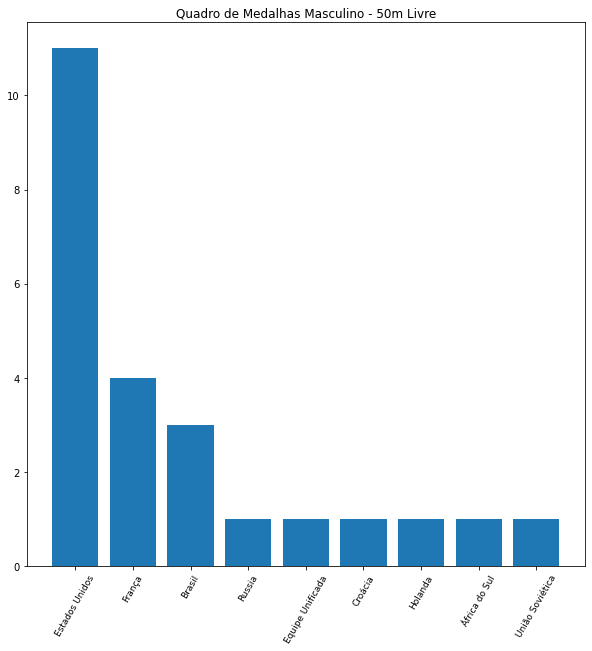

In [209]:
# Aumentando o tamanho dos gráficos
plt.figure(figsize=(10,10))
#Plotando o gráfico de barras
plt.bar(Paísm,Total)
plt.xticks (rotation= 60, fontsize=9)
plt.title("Quadro de Medalhas Masculino - 50m Livre")
plt.show()

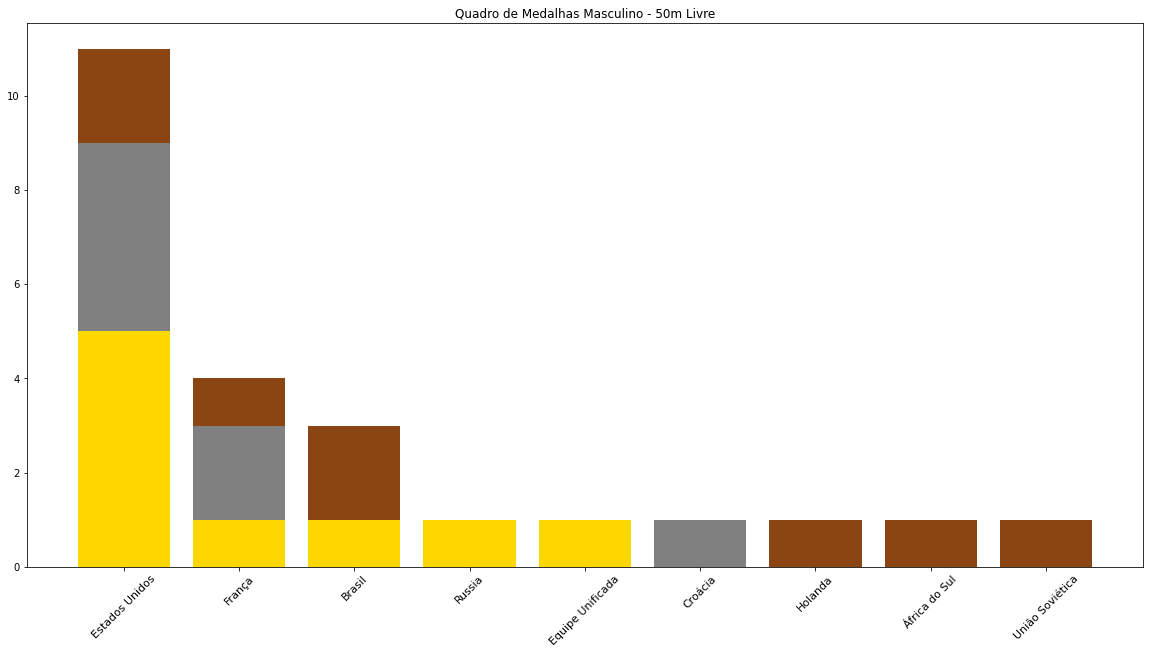

In [210]:
# Gráfico de Barras Aninhado
Paísm=['Estados Unidos','França','Brasil','Russia','Equipe Unificada','Croácia','Holanda','África do Sul','União Soviética']
Total=[11,4,3,1,1,1,1,1,1]

Ouro=[5,1,1,1,1,0,0,0,0]
Prata=[4,2,0,0,0,1,0,0,0]
Bronze=[2,1,2,0,0,0,1,1,1]

# Aumentando o tamanho dos gráficos
plt.figure(figsize=(20,10))

#Plotando o gráfico de barras
plt.bar(Paísm, Ouro, color = 'gold')
plt.bar(Paísm, Prata, color = 'grey', bottom = np.array(Ouro))
plt.bar(Paísm, Bronze, color = 'saddlebrown', bottom = np.array(Ouro) + np.array(Prata))


plt.xticks (rotation= 45, fontsize=11)
plt.title("Quadro de Medalhas Masculino - 50m Livre")
plt.show()

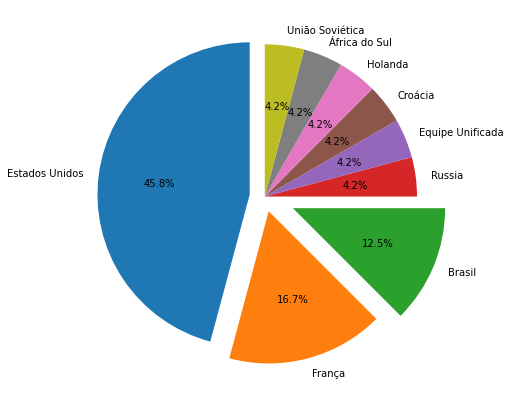

In [211]:
# Imprimir gráfico de Pizza para verificação de Porcentagem
Paísm=['Estados Unidos','França','Brasil','Russia','Equipe Unificada','Croácia','Holanda','África do Sul','União Soviética']
Total=[11,4,3,1,1,1,1,1,1]
explode = (0.1,0.1,0.2,0,0,0,0,0,0)

# Criando a figura para a plotagem
plt.subplots(figsize=(7,7))

# Fazendo um gráfico de Pizza para melhor visualizacao
plt.pie(x= Total, labels=Paísm, explode=explode, autopct='%1.1f%%', startangle=90)

# Mostrando o grafico
plt.show()

In [212]:
# Verificando as informações da tabela 
tabela50m3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 1 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   País    9 non-null      object
 1   Ouro    9 non-null      object
 2   Prata   9 non-null      object
 3   Bronze  9 non-null      object
 4   Total   9 non-null      object
dtypes: object(5)
memory usage: 492.0+ bytes


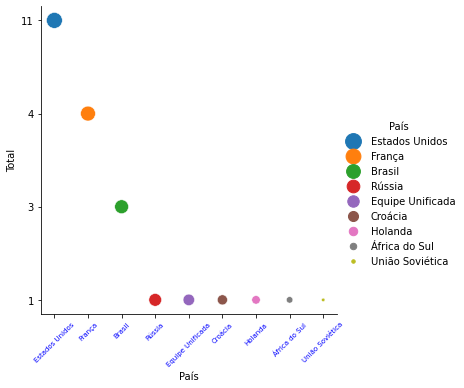

In [213]:
# Imprimindo o gráfico scatter - relplot - Masculino
sns.relplot(x="País", y="Total", data=tabela50m3, hue="País", sizes=(12,250), size="País")
plt.xticks(color='blue',rotation=45,size=7)
#sns.relplot(x="País", y="Ouro", data=tabela50m3, hue="País", sizes=(12,250), size="País")
#plt.xticks(color='blue',rotation=45,size=7)
plt.show()

In [214]:
# Automatizar a construção de Gráficos:
#for coluna in tabela50m3: #Por padrão no for ele percorre as colunas
#    grafico = px.histogram(tabela50m3, x=coluna, color="País")
#    grafico.show()
#Podemos olhar cada um dos gráficos que "saltam aos olhos"